## 📘 Introduction
Welcome to this beginner-friendly notebook where we'll:
1. Explore the **Titanic dataset** with detailed EDA.
2. Learn 4 basic classification algorithms:
   - Logistic Regression
   - K-Nearest Neighbors (KNN)
   - Decision Trees
   - Random Forest

We'll keep explanations simple and intuitive. Let's dive in! 🚢

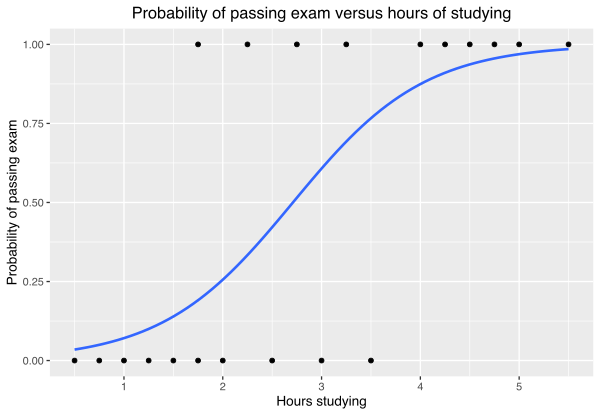

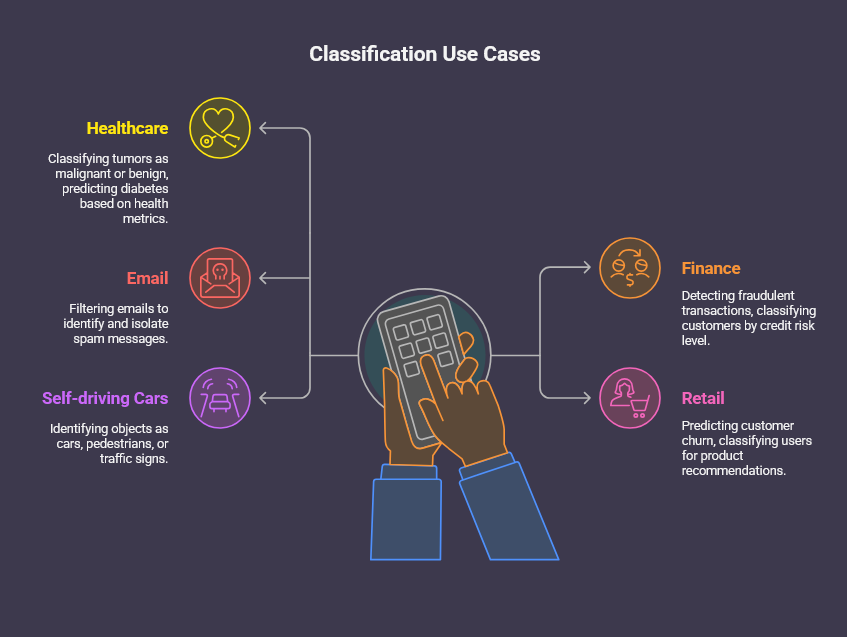

## ❓ Why Not Linear Regression for Classification?
- **Linear Regression** is used for predicting continuous values, not categories.
- It can output values < 0 or > 1, which makes no sense for binary outcomes like "survived or not".
- **Logistic Regression** fixes this using the **Sigmoid Function**, which squashes outputs to a 0-1 range (interpreted as probability).
- **Summary:** Logistic Regression = Better fit for binary classification.

Linear regression is not suitable for classification problems because it's designed to predict continuous numerical values, while classification requires predicting discrete categories or classes.


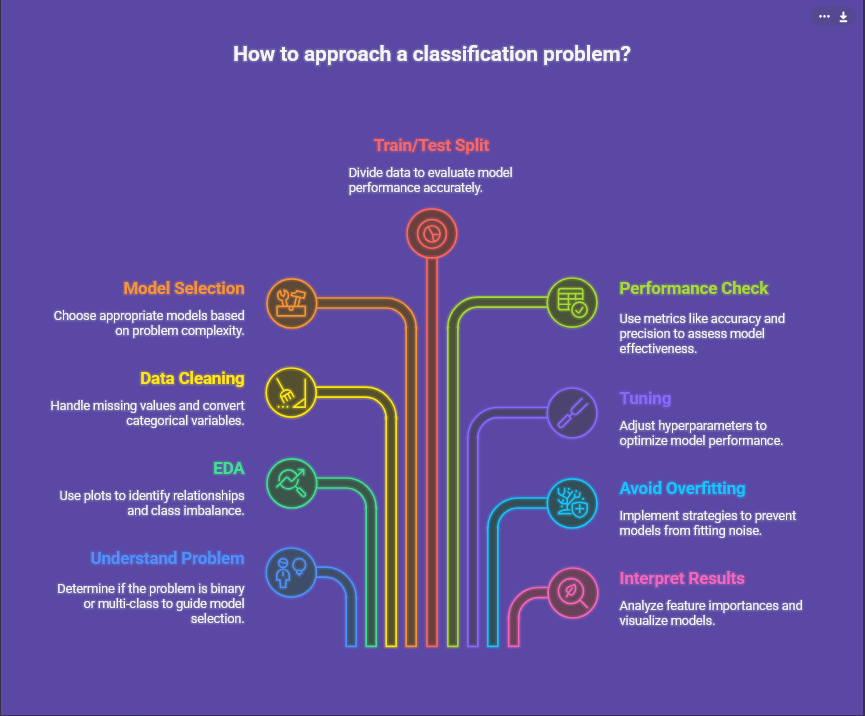


## 📌 Tips for Classification Problems
### ✅ Step-by-step Strategy:
1. **Understand the Problem:** Is it binary or multi-class?
2. **EDA is key!** Use plots to understand relationships and spot class imbalance.
3. **Clean the Data:**
   - Handle missing values.
   - Convert categorical variables.
   - Normalize/scale features (especially for KNN).
4. **Choose Models to Try:**
   - Start simple: Logistic Regression or Decision Tree.
   - Try ensemble methods: Random Forest or Gradient Boosting.
5. **Train/Test Split:** Always split data to evaluate correctly.
6. **Check Performance:**
   - Use Accuracy, Precision, Recall, F1-score.
   - Confusion matrix helps visualize predictions.
7. **Tuning:**
   - Try different hyperparameters (e.g., K in KNN, depth in Trees).
   - Use `GridSearchCV` or `RandomizedSearchCV`.
8. **Avoid Overfitting:**
   - Prune decision trees.
   - Use regularization in logistic regression.
   - Try ensemble models like Random Forest.
9. **Interpret Results:**
   - Look at feature importances.
   - Visualize tree-based models.





## 📦 Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 📂 Step 2: Load Titanic Dataset

In [ ]:
# Load Titanic dataset directly from seaborn
import seaborn as sns

data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 🧼 Step 3: Basic Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
data['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [ ]:
# Drop rows with too many missing values
data.drop(['deck'], axis=1, inplace=True)

# Fill missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Drop less useful columns
data.drop(['embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1, inplace=True)

# Convert categorical variables to numeric
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'])
data['alone'] = data['alone'].astype(int)

# Final check
data.head()

/tmp/ipython-input-48-1568419650.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
/tmp/ipython-input-48-1568419650.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1


## 📊 Step 4: Exploratory Data Analysis (EDA)
### Survival Count

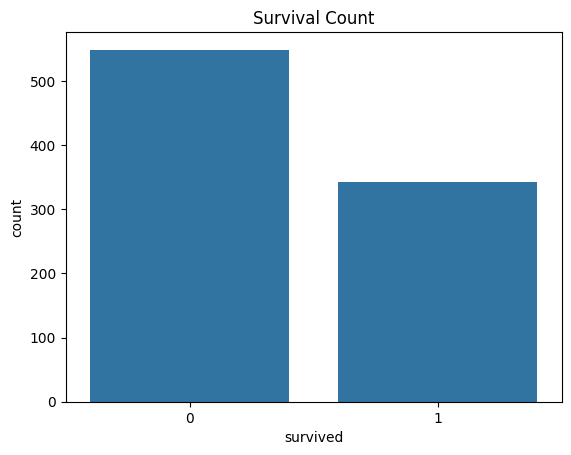

In [ ]:
sns.countplot(x='survived', data=data)
plt.title('Survival Count')
plt.show()

In [ ]:
# 100 -> 95 (Survive 0 ) + 5 (survive) ->   |      Test (20 (survive 0) 30 Survive 1)

# 1 . Upsampling  95
# 2. downsampling
# 3. Smote

# 95 (Survive 0)         First 5 + First 5 +first 5 ...=95 (Survive 1) ->

# 5 (Survive 0) + 5 (Survive 1) -> downsampling



📌 **Explanation:** More people did not survive (0) than those who did (1).

### Survival Rate by Sex

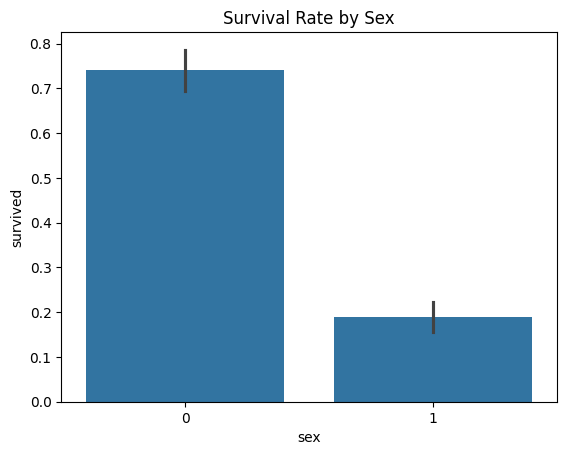

In [ ]:
sns.barplot(x='sex', y='survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

📌 **Explanation:** Females had a much higher chance of survival compared to males.

### Age Distribution

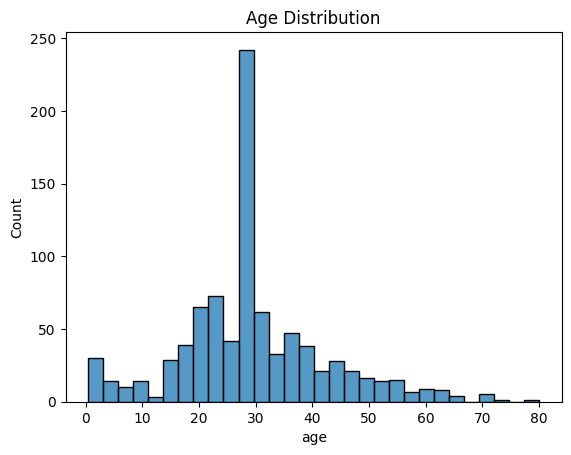

In [ ]:
sns.histplot(data['age'], bins=30)
plt.title('Age Distribution')
plt.show()


📌 **Explanation:** Most passengers were between 20 and 40 years old.

### Survival by Age Group

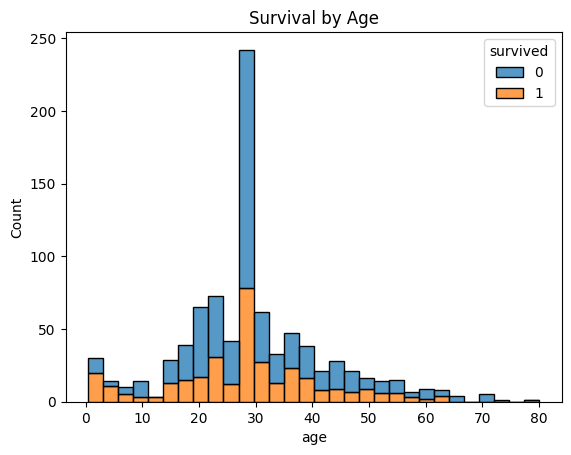

In [ ]:
sns.histplot(data=data, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Survival by Age')
plt.show()

📌 **Explanation:** Young children had a better survival rate. Older passengers had a lower chance.

### Survival by Passenger Class

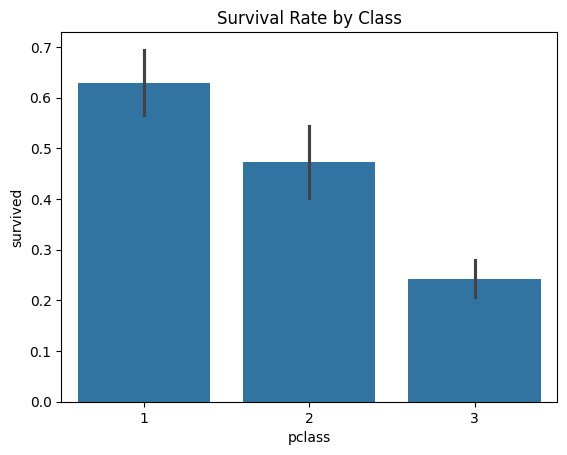

In [ ]:
sns.barplot(x='pclass', y='survived', data=data)
plt.title('Survival Rate by Class')
plt.show()

📌 **Explanation:** First-class passengers had the highest survival rate, while third-class had the lowest.

### Heatmap for correlation

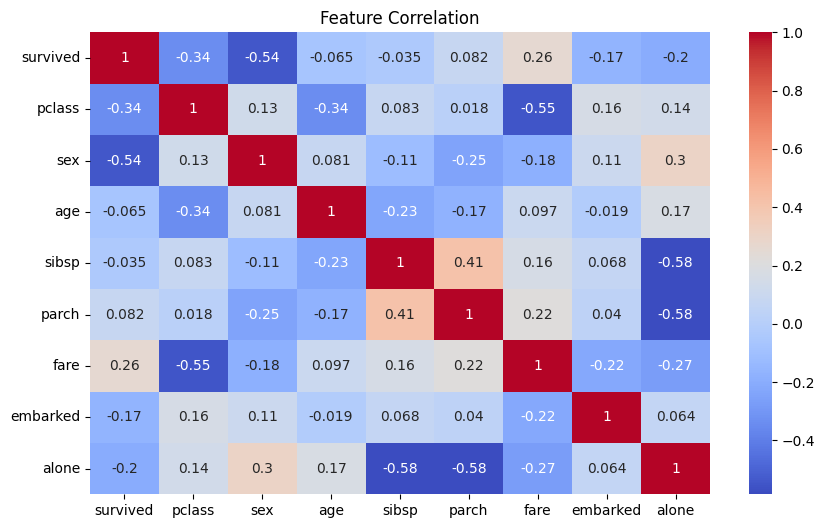

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

📌 **Explanation:** Features like sex (converted to numbers) and class are highly correlated with survival.




## 🧪 Step 5: Train-Test Split

## ✨ Feature Scaling

Scaling features helps improve the performance of some algorithms by ensuring all features have a similar scale. We'll use `StandardScaler` to standardize the features.

In [ ]:
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Data:")
display(X_train_scaled.head())

print("\nScaled Test Data:")
display(X_test_scaled.head())

Scaled Training Data:


,pclass,sex,age,sibsp,parch,fare,embarked,alone
331,-1.614136,0.724310,1.253641,-0.470722,-0.479342,-0.078684,0.563525,0.812203
733,-0.400551,0.724310,-0.477284,-0.470722,-0.479342,-0.377145,0.563525,0.812203
382,0.813034,0.724310,0.215086,-0.470722,-0.479342,-0.474867,0.563525,0.812203
704,0.813034,0.724310,-0.246494,0.379923,-0.479342,-0.476230,0.563525,-1.231219
813,0.813034,-1.380624,-1.785093,2.931860,2.048742,-0.025249,0.563525,-1.231219



Scaled Test Data:


,pclass,sex,age,sibsp,parch,fare,embarked,alone
709,0.813034,0.724310,-0.092634,0.379923,0.784700,-0.333901,-2.025053,-1.231219
439,-0.400551,0.724310,0.138156,-0.470722,-0.479342,-0.425284,0.563525,0.812203
840,0.813034,0.724310,-0.708074,-0.470722,-0.479342,-0.474867,0.563525,0.812203
720,-0.400551,-1.380624,-1.785093,-0.470722,0.784700,0.007966,0.563525,-1.231219
39,0.813034,-1.380624,-1.169653,0.379923,-0.479342,-0.411002,-2.025053,-1.231219


In [ ]:
print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)

Training Data Shape: (712, 8)
Testing Data Shape: (179, 8)


## 🤖 Logistic Regression
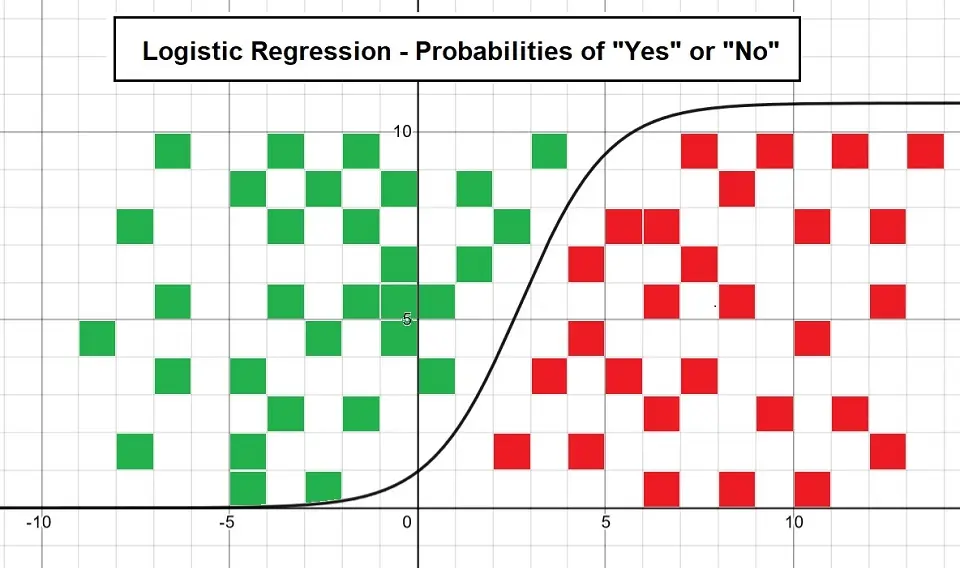
### What is it?

Logistic Regression is used to predict binary outcomes (like survive or not).

### Sigmoid Function:

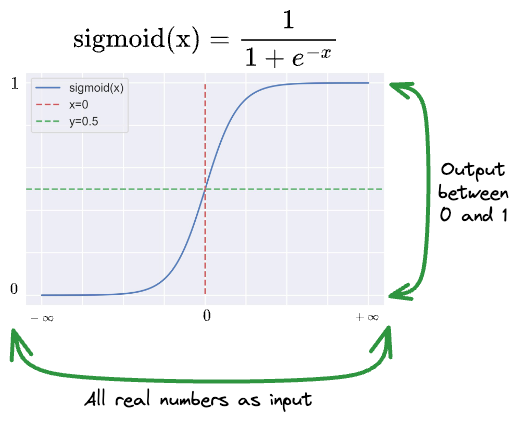
It squashes values between 0 and 1. These values are interpreted as probabilities.

The sigmoid function is a mathematical function that maps any real-valued number to a value between 0 and 1, producing an S-shaped curve.

In [ ]:
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train_scaled, y_train)
pred_log = model_log.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_log))
print(classification_report(y_test, pred_log))

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## 🤖 K-Nearest Neighbors (KNN)
### How it works?

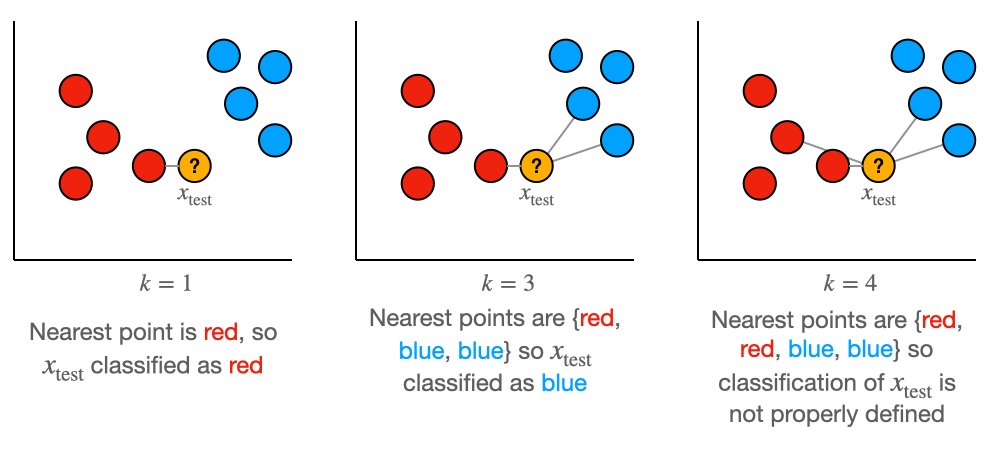
- Looks at K closest points.
- Chooses the majority class among them.

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train_scaled, y_train)
pred_knn = model_knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



### Choosing the right K:

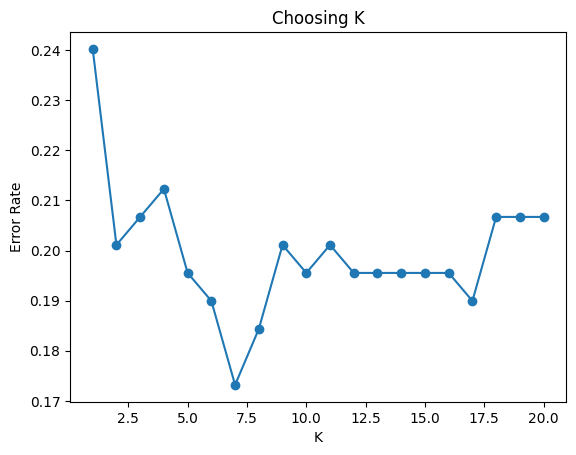

In [ ]:
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

100000


           GENDER -> f
      sURVIVIED       cLASS 1
                   sURVIVIED  uNSURVIED


## 🤖 Decision Trees
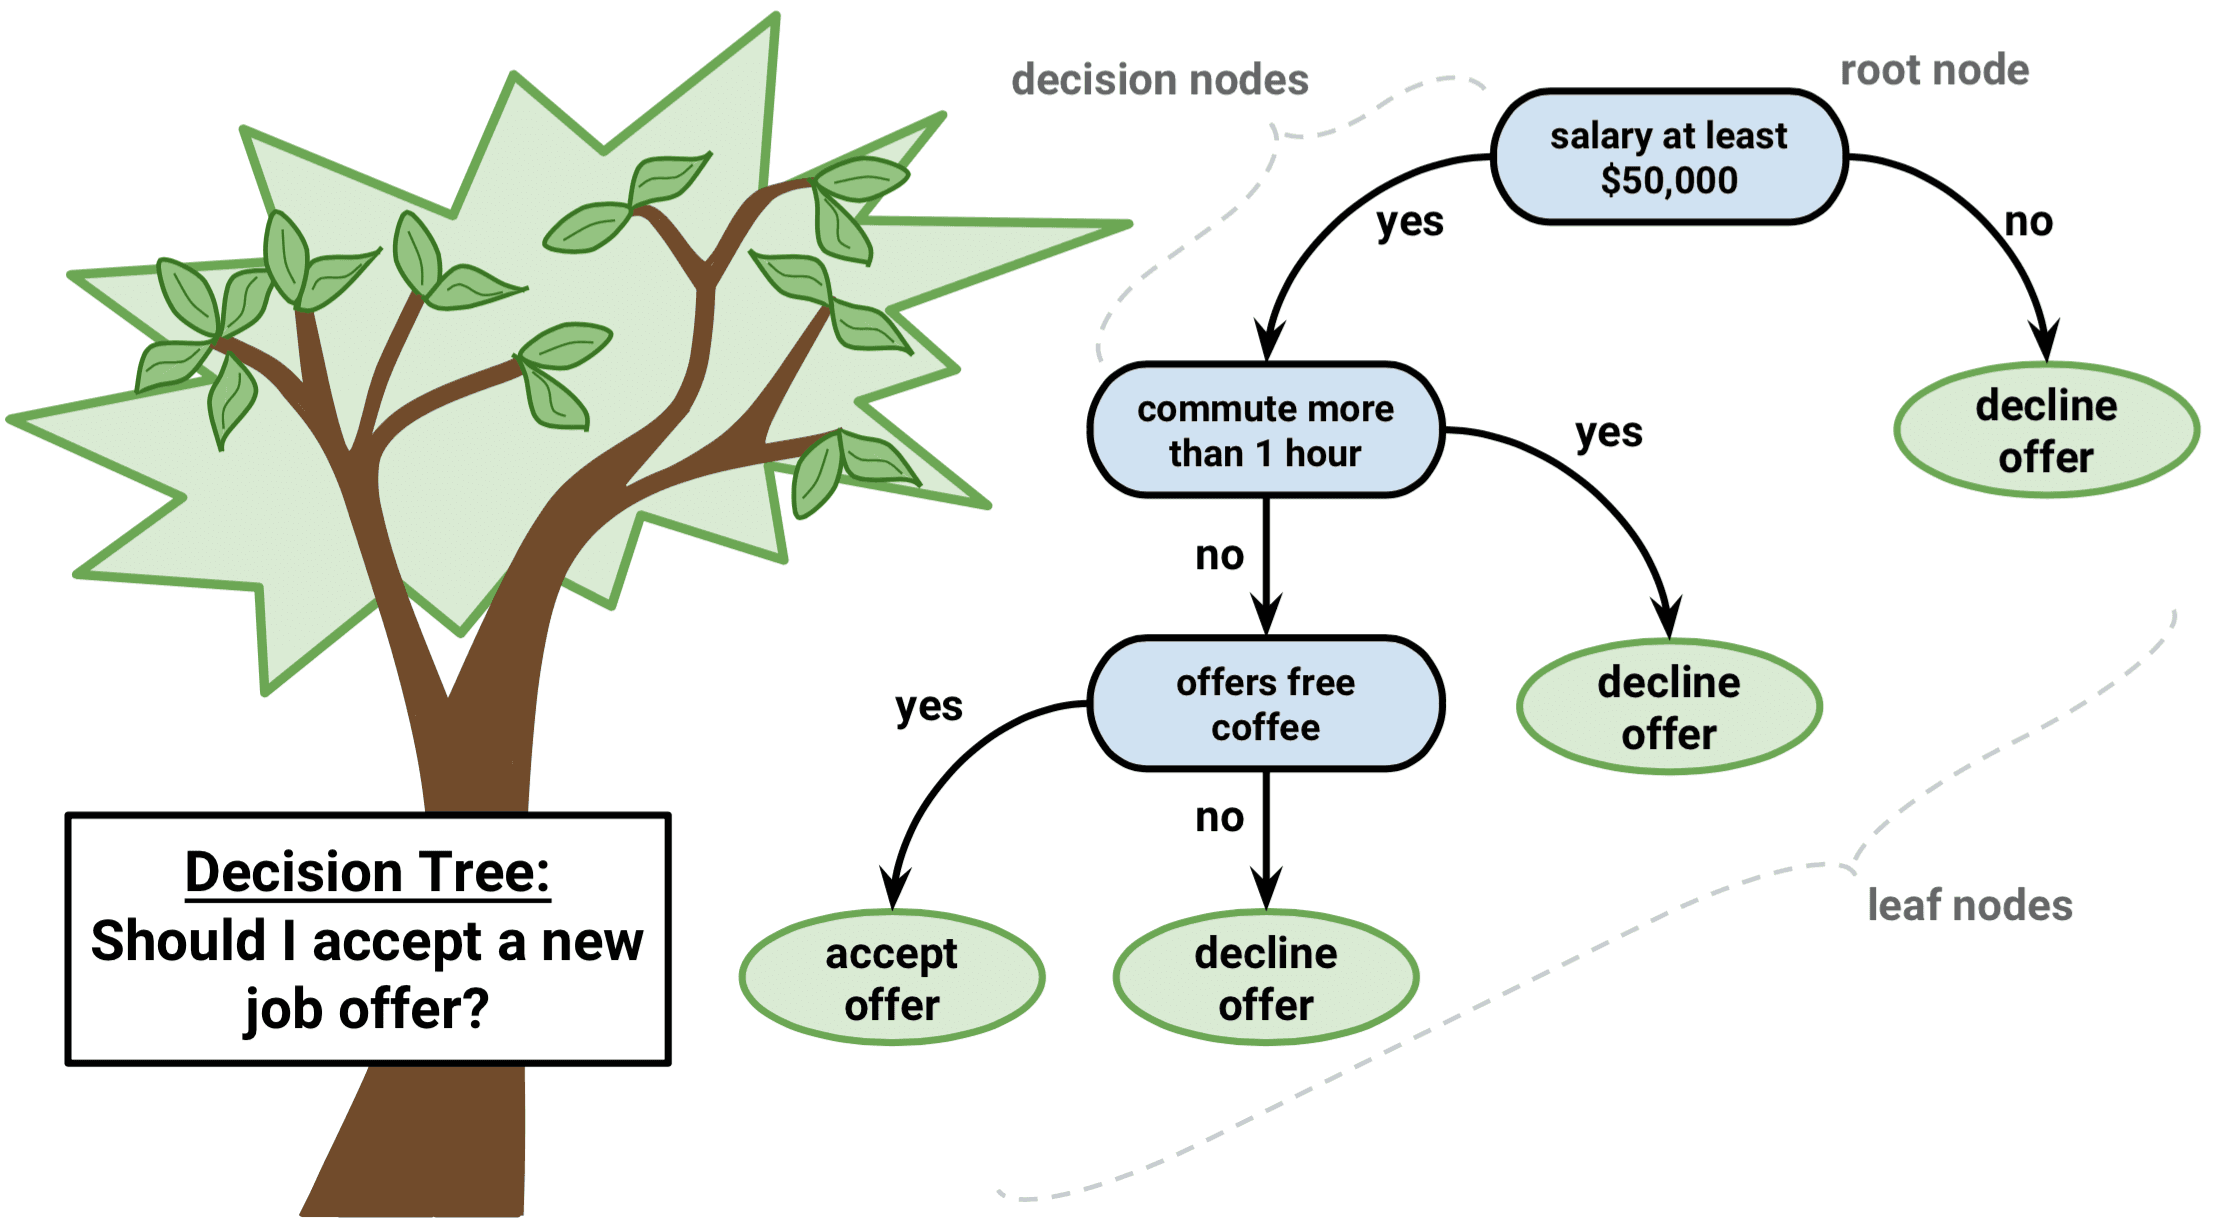
### How they work:
- Split data using questions.
- Each question increases "purity" of split.


Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



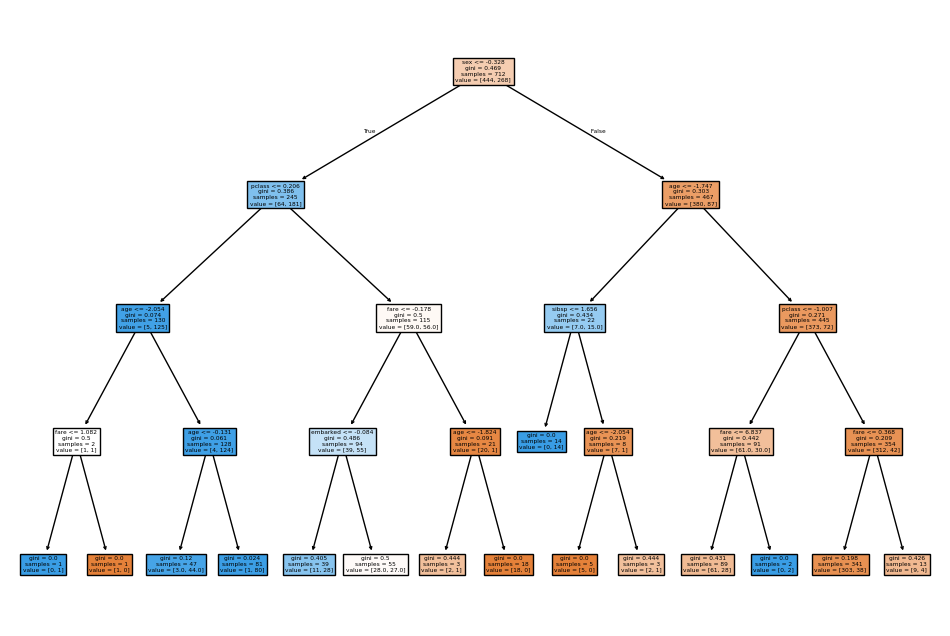

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train_scaled, y_train)
pred_tree = model_tree.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

# Visualize Tree
plt.figure(figsize=(12,8))
plot_tree(model_tree, filled=True, feature_names=X.columns)
plt.show()

### Overfitting and Pruning:
- Deep trees = high training accuracy, low test accuracy.
- Pruning limits depth to prevent overfitting.

## 🌳 Random Forest Classifier
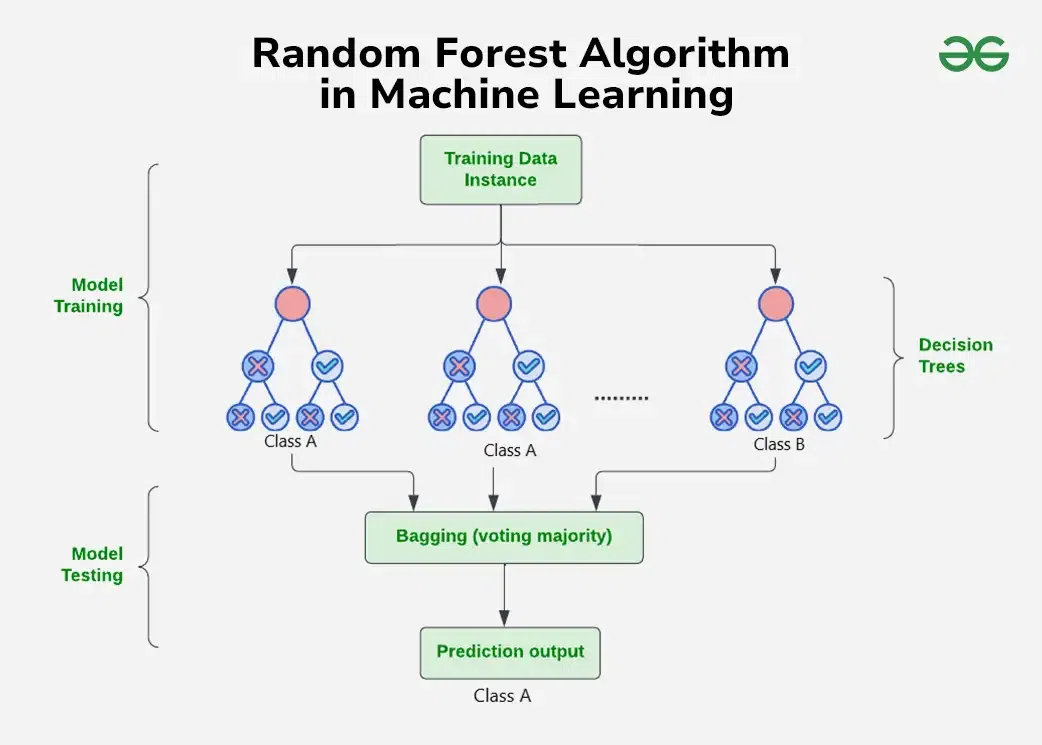
### What is it?
- A collection of decision trees.
- More accurate than a single tree.
- Helps avoid overfitting.

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
## 📊 Comparison

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, pred_log),
              accuracy_score(y_test, pred_knn),
              accuracy_score(y_test, pred_tree),
              accuracy_score(y_test, pred_rf)]

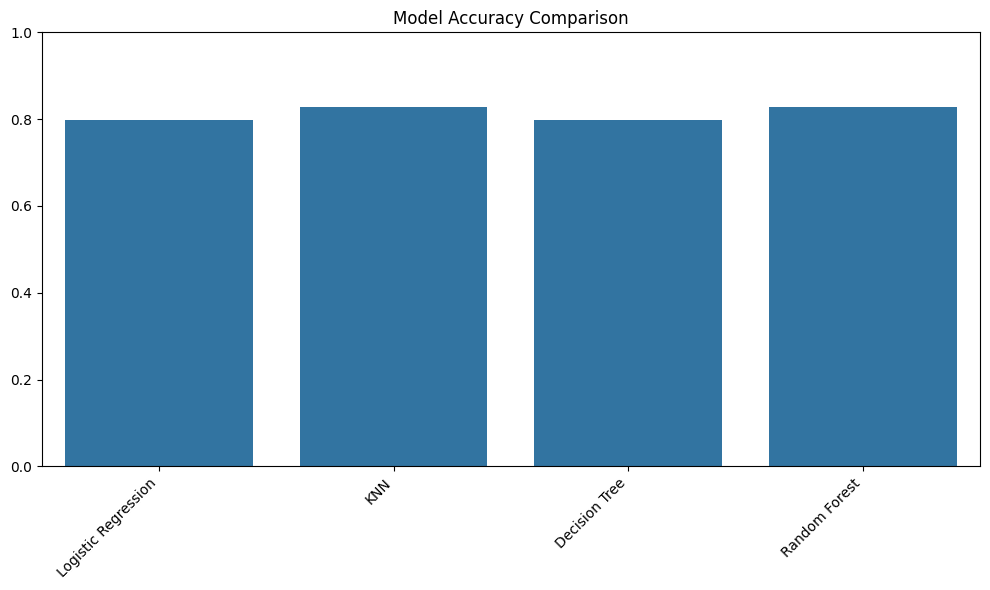

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## ✅ Summary
- Logistic Regression: Uses probability, good for linear relationships.
- KNN: Simple and intuitive, depends on neighbors.
- Decision Trees: Flowchart-style, good for interpretation.
- Random Forest: Combines trees for better accuracy, avoids overfitting.

Try tweaking parameters, visualizing more, and exploring the Titanic dataset further! 🚢✨
